### About the DataSet

In [1]:
# Downloaded this Dataset from Kaggle and Modelled using KNN classification:
# The Dataset Details:

# A_id: Unique identifier for each fruit
# Size: Size of the fruit
# Weight: Weight of the fruit
# Sweetness: Degree of sweetness of the fruit
# Crunchiness: Texture indicating the crunchiness of the fruit
# Juiciness: Level of juiciness of the fruit
# Ripeness: Stage of ripeness of the fruit
# Acidity: Acidity level of the fruit

# To predict the Quality of apple based on the above parameters
# Quality: Overall quality of the fruit
# The output is a binary classification.

### Importing necessary Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc

### Importing the Dataset

In [3]:
data = pd.read_csv("C:/Users/Sowmya Ganesh/All files/apple_quality.csv")
data.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### Basic Data Checking 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736


In [6]:
data.shape

(4000, 9)

The Dataset has 4000 rows and 9 columns

### Exploratory Data Analysis(EDA)

#### Heatmap

<Axes: >

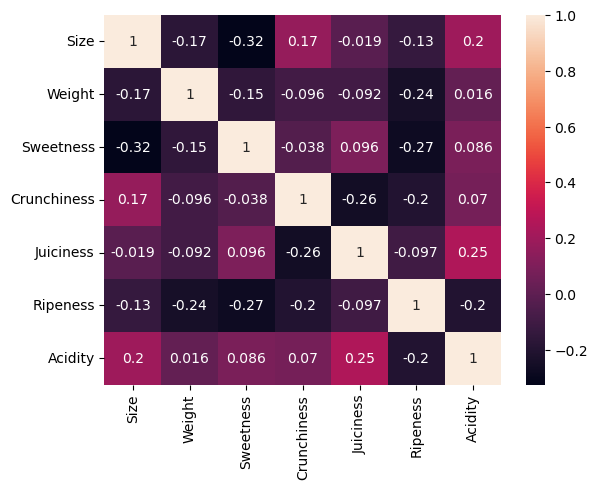

In [7]:
sns.heatmap(data[["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness","Acidity"]].corr(),annot=True)

#### Countplot

<Axes: xlabel='Quality', ylabel='count'>

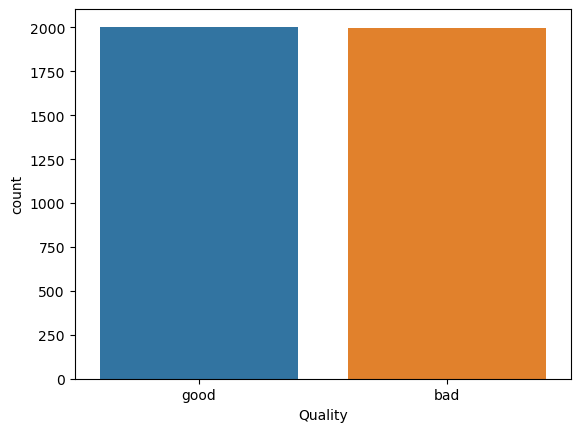

In [8]:
sns.countplot(x=data.Quality)

In [9]:
data.Quality.value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

#### Lineplot 

<Axes: xlabel='Quality', ylabel='Size'>

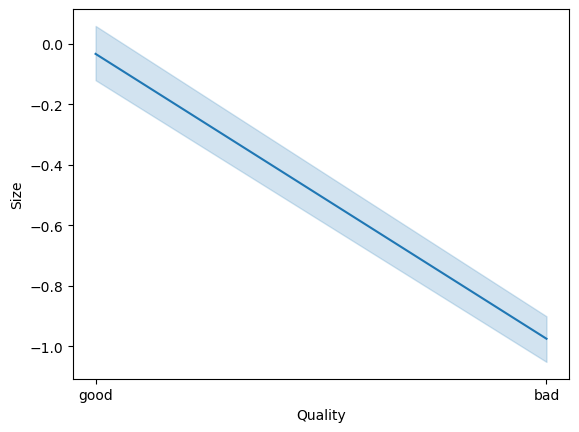

In [10]:
sns.lineplot(x=data.Quality,y=data.Size)

<Axes: xlabel='Quality', ylabel='Weight'>

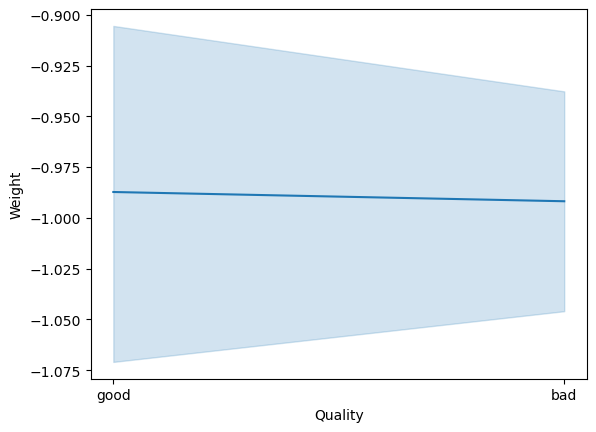

In [11]:
sns.lineplot(x=data.Quality,y=data.Weight)

<Axes: xlabel='Quality', ylabel='Sweetness'>

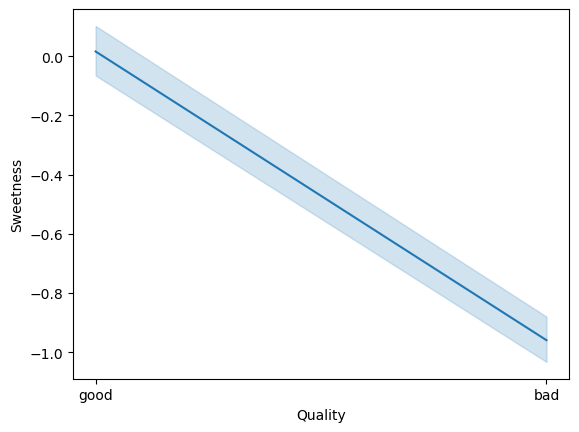

In [12]:
sns.lineplot(x=data.Quality,y=data.Sweetness)

<Axes: xlabel='Quality', ylabel='Crunchiness'>

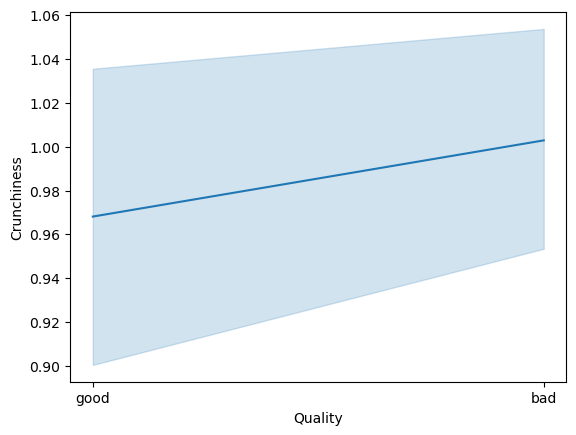

In [13]:
sns.lineplot(x=data.Quality,y=data.Crunchiness)

<Axes: xlabel='Quality', ylabel='Juiciness'>

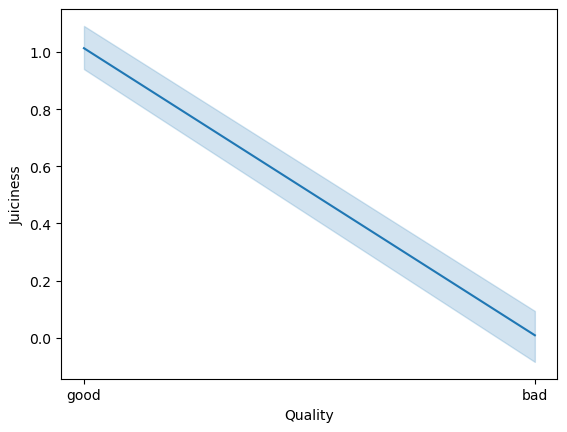

In [14]:
sns.lineplot(x=data.Quality,y=data.Juiciness)

<Axes: xlabel='Quality', ylabel='Ripeness'>

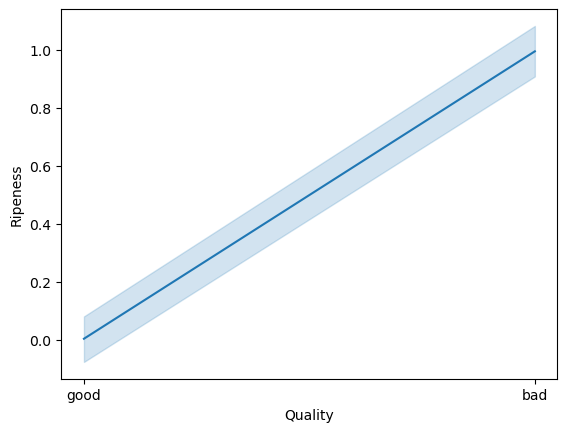

In [15]:
sns.lineplot(x=data.Quality,y=data.Ripeness)

<Axes: xlabel='Quality', ylabel='Acidity'>

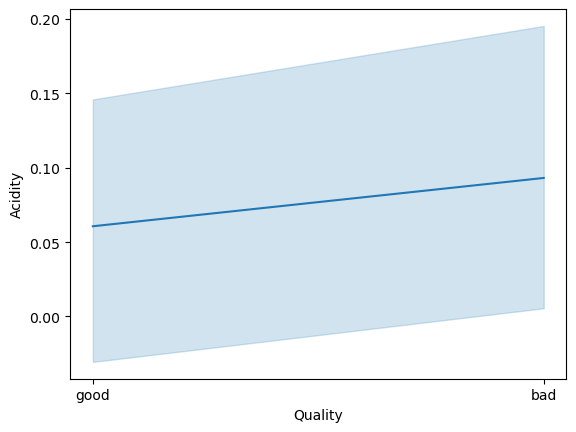

In [16]:
sns.lineplot(x=data.Quality,y=data.Acidity)

### Data preprocessing

In [17]:
#Converting the column Quality into 1 and 0 instead of good and bad
data['Quality'] = data['Quality'].replace({'good': 1, 'bad': 0})

In [18]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


In [19]:
### Splitting the Data into X-independent variable and y-dependent variable(here Quality)
X = data[["Size","Weight","Sweetness","Crunchiness","Juiciness","Ripeness","Acidity"]]
X.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [20]:
y = data['Quality']  
y.head(5)

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [21]:
## The Data is in scaled format.

### KNN-Classification  Model Training

In [31]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify = y)

print('**************************************')
print("Training size of data")
print(X_train.shape,y_train.shape)
print("Testing size of data")
print(X_test.shape,y_test.shape)
print("**************************************")

#Creating the model
print("The Logistic Model")
model = KNeighborsClassifier(n_neighbors=3)
KNN_train = model.fit(X_train,y_train)
pred = KNN_train.predict(X_test)

##Accracy score of thr training model
Accu = KNN_train.score(X_train,y_train)
print("Accuracy of the training model:",round(Accu*100,2),"%.")
print("**************************************")

cf = confusion_matrix(y_test,pred,labels = KNN_train.classes_)
print('The confusion matrix:\n',cf)
print("***************************************")

Accuracy = (362+359)/(362+359+37+42) 
print("The accuracy of the testing model:",round(Accuracy*100,2),"%.")
print("****************************************")

Error = (37+42)/(362+359+37+42)
print("The error in the model:",round(Error*100,2),"%.")

**************************************
Training size of data
(3200, 7) (3200,)
Testing size of data
(800, 7) (800,)
**************************************
The Logistic Model
Accuracy of the training model: 94.5 %.
**************************************
The confusion matrix:
 [[354  45]
 [ 51 350]]
***************************************
The accuracy of the testing model: 90.12 %.
****************************************
The error in the model: 9.88 %.


In [23]:
## To check n value for neighbors
error = []
k = []
for i in range(1,21): #for odd values we are using the step
    model_clf = KNeighborsClassifier(n_neighbors=3)
    model_clf_train = model_clf.fit(X_train, y_train)
    pred = model_clf_train.predict(X_test)
    err = 1 - round(accuracy_score(y_test,pred),2)  
    error.append(err)  
    k.append(i)

In [24]:
pd.DataFrame({'K':k,'Error':error})

,K,Error
0,1,0.1
1,2,0.1
2,3,0.1
3,4,0.1
4,5,0.1
5,6,0.1
6,7,0.1
7,8,0.1
8,9,0.1
9,10,0.1


In [25]:
#n-value can be chosen between 1 to 19 as these all have the same error 

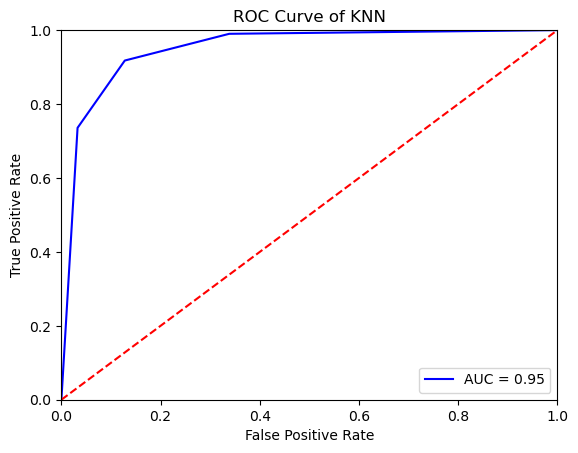

In [26]:
# Get probability estimates for positive class
y_scores = KNN_train.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, 'b', label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN')
plt.legend(loc='lower right')
plt.show()

In [27]:
auc(fpr,tpr)

0.9498840617753861

In [30]:
print("The accuracy of the testing model:",round(Accuracy*100,2),"%.")
print("The error in the model:",round(Error*100,2),"%.")

The accuracy of the testing model: 90.12 %.
The error in the model: 9.88 %.


In [ ]:
# The ROC(Receiver operating characteristic) curve determines how good our model is.
# The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.
# A greater AUC value indicates better model performance.
# Here since our curve has greater Area under the curve, the model is a gtreat model.